In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [2]:
data_dir = "model_outputs/2023_05_07:15_16_57/"

In [3]:
os.listdir(data_dir)

['2023_05_07:15_50_50', '2023_05_07:16_58_05', '2023_05_07:16_25_05']

In [7]:
def aggregate_result(df,index):
    agg_df = df.groupby('epoch').mean()
    agg_df.drop('fold',axis=1,inplace=True)
    agg_df['config_index'] = index
    
    return agg_df


def plot_single_config(idx,data_dir):
    # idx references the index of the global configuration (i.e. ablation-setting)

    # model_outputs/study/[ablation_idx]/[config_idx] 
    
    config_dir = os.listdir(data_dir)[idx]



    dfs = {}
    configurations = {}
    for config_index in range(len(os.listdir(data_dir+config_dir))):
        df = pd.read_csv(data_dir+config_dir+'/'+str(config_index)+'/results.csv')
        dfs[config_index] = df
        
        with open(data_dir+config_dir+'/'+str(config_index)+'/parameters.json','r') as file:
            for line in file:
                conf = json.loads(line)
        
        configurations[config_index] = conf
        
        
    
    
    for cidx, conf in configurations.items():
        print(cidx)
        print(conf)
        print()
        print()
        print()
    
    plt.style.use('fivethirtyeight')
    for index,df in dfs.items():
        agg_df = aggregate_result(df,index)

        agg_df[['train_loss_median','val_loss_median']].plot(figsize=[16,9])
        plt.ylim([60,100])
        plt.show()
        
        
    

In [12]:
def get_best_model(idx,data_dir,eval_metrix = 'val_loss_median'):
    # idx references the index of the global configuration (i.e. ablation-setting)
    # model_outputs/study/[ablation_idx]/[config_idx] 
    # This means that this function returns the best model for a given ablation study (fx excluding channel 0 or channel 1 or satellite 2...)

    config_dir = os.listdir(data_dir)[idx]



    dfs = {}
    configurations = {}
    for config_index in range(len(os.listdir(data_dir+config_dir))):
        df = pd.read_csv(data_dir+config_dir+'/'+str(config_index)+'/results.csv')
        dfs[config_index] = df
        
        with open(data_dir+config_dir+'/'+str(config_index)+'/parameters.json','r') as file:
            for line in file:
                conf = json.loads(line)
        
        configurations[config_index] = conf

    
    cur_min = 1000
    cur_min_index = 99
    best_agg = None
    for index,df in dfs.items():
        agg_df = aggregate_result(df,index)
        m = agg_df[eval_metrix].min()
        if m<cur_min:
            cur_min = m
            cur_min_index = index
            best_agg = agg_df
            
            
    return best_agg,configurations[cur_min_index]


In [25]:
# WHICH MODEL DO YOU WANT TO PLOT

root_dir = 'model_outputs/'

all_channels = '2023_05_07:17_16_42/'
satellites = '2023_05_07:15_16_57/'
satellites = '2023_05_09:12_18_08/'



data_path = root_dir+satellites

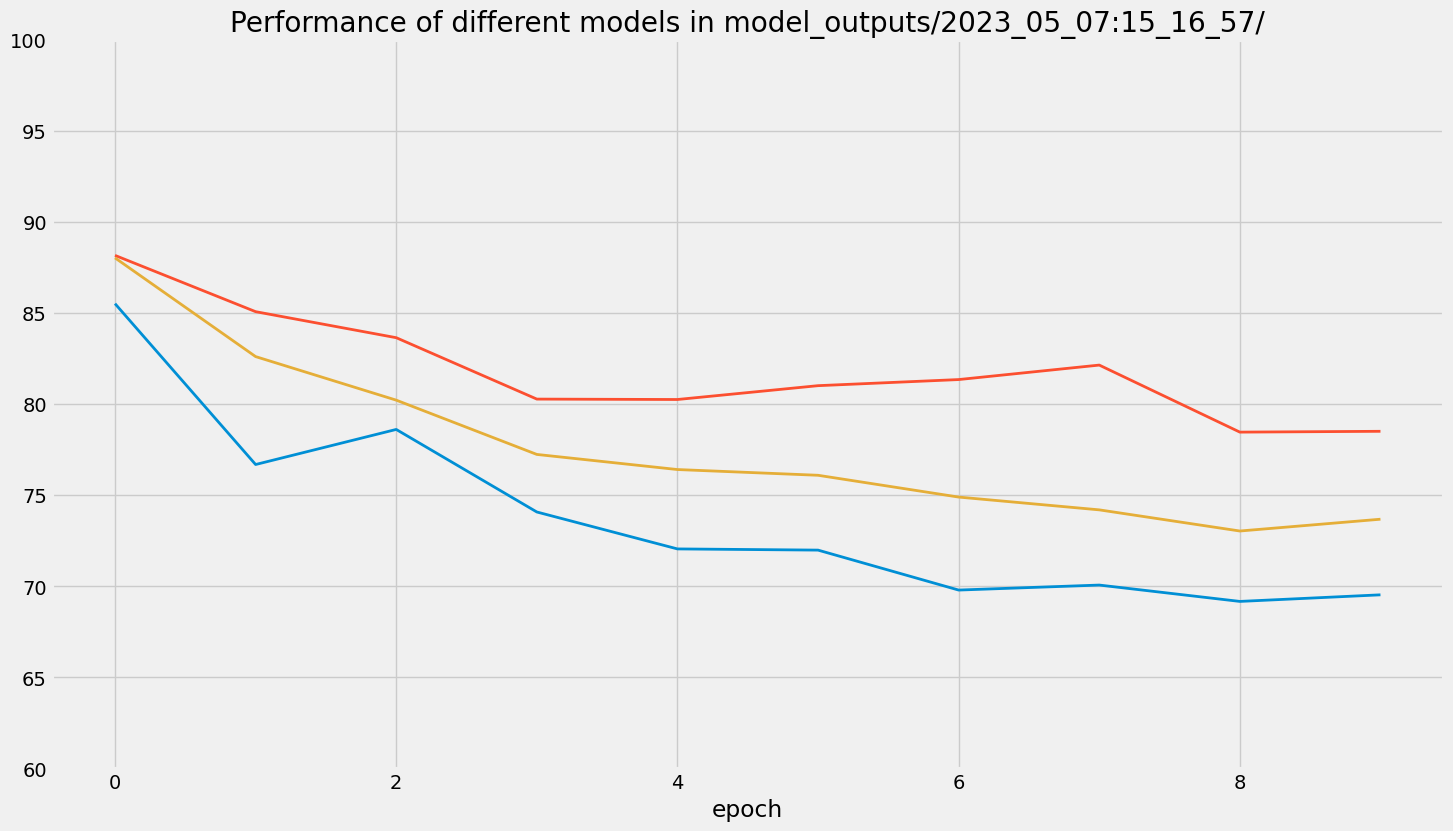

In [26]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=[16,9])
for idx in range(3):
    res,conf = get_best_model(idx,data_dir)
    res['val_loss_median'].plot(linewidth = 2)
    plt.ylim([60,100])
plt.title('Performance of different models in '+data_dir)
plt.show()

## Plot Single Configuration (not that interesting)

0
{'num_input_channels': 4, 'conv_filters1': 4, 'conv_filters2': 8, 'conv_filters3': 4, 'num_dpoints': 600, 'exclude_layer': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'exclude_layer_name': 'S2-B2: Blue-10m, S2-B3: Green-10m, S2-B4: Red-10m, S2-B5: VegRed-704nm-20m, S2-B6: VegRed-740nm-20m, S2-B7: VegRed-780nm-20m, S2-B8: NIR-833nm-10m, S2-B8A: NarrowNIR-864nm-20m, S2-B11: SWIR-1610nm-20m, S2-B12: SWIR-2200nm-20m, S2-CLP: Clouse_gpuudProb-160m', 'num_epochs': 10}



1
{'num_input_channels': 4, 'conv_filters1': 8, 'conv_filters2': 16, 'conv_filters3': 16, 'num_dpoints': 600, 'exclude_layer': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'exclude_layer_name': 'S2-B2: Blue-10m, S2-B3: Green-10m, S2-B4: Red-10m, S2-B5: VegRed-704nm-20m, S2-B6: VegRed-740nm-20m, S2-B7: VegRed-780nm-20m, S2-B8: NIR-833nm-10m, S2-B8A: NarrowNIR-864nm-20m, S2-B11: SWIR-1610nm-20m, S2-B12: SWIR-2200nm-20m, S2-CLP: Clouse_gpuudProb-160m', 'num_epochs': 10}



2
{'num_input_channels': 4, 'conv_filters1': 16, 'conv_filters2': 32, 

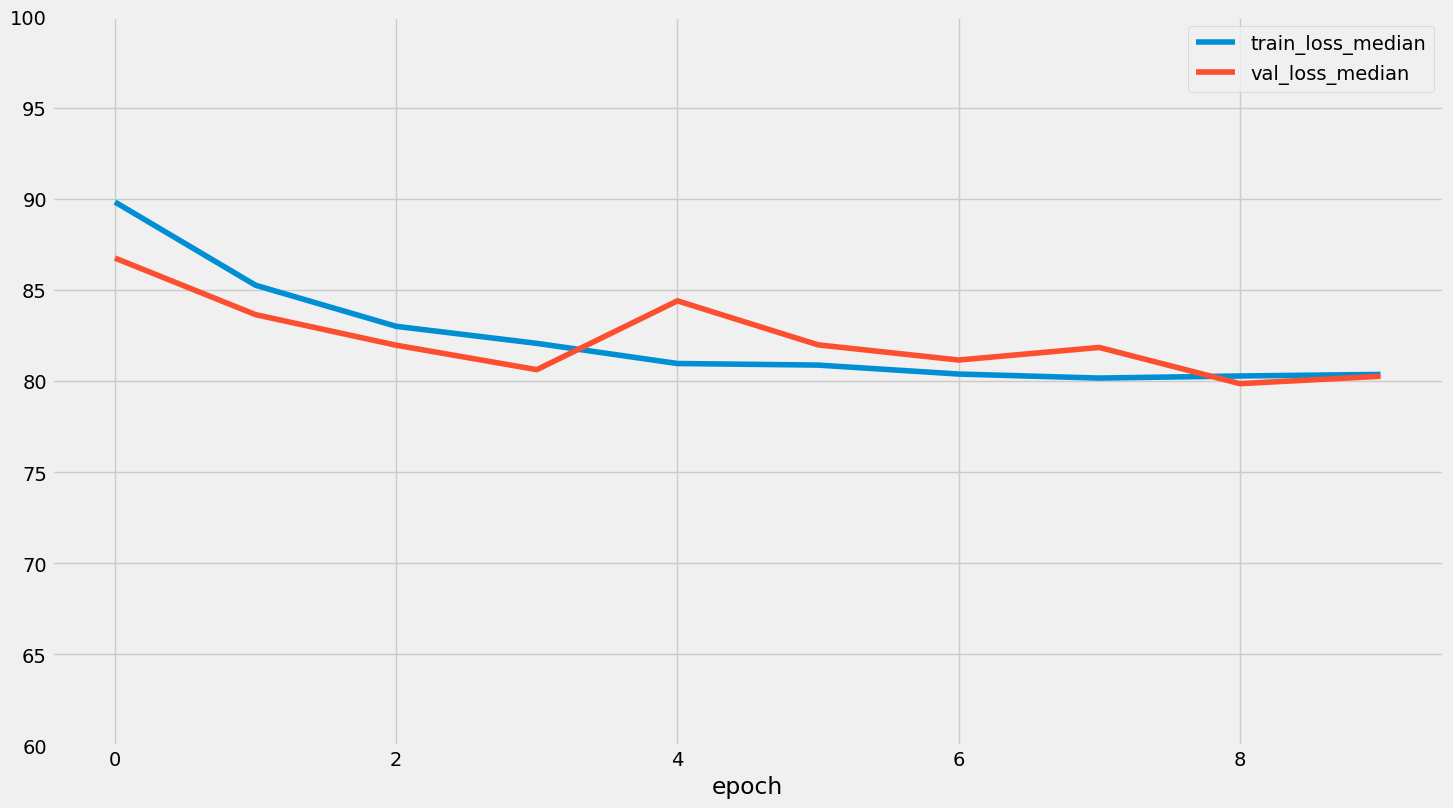

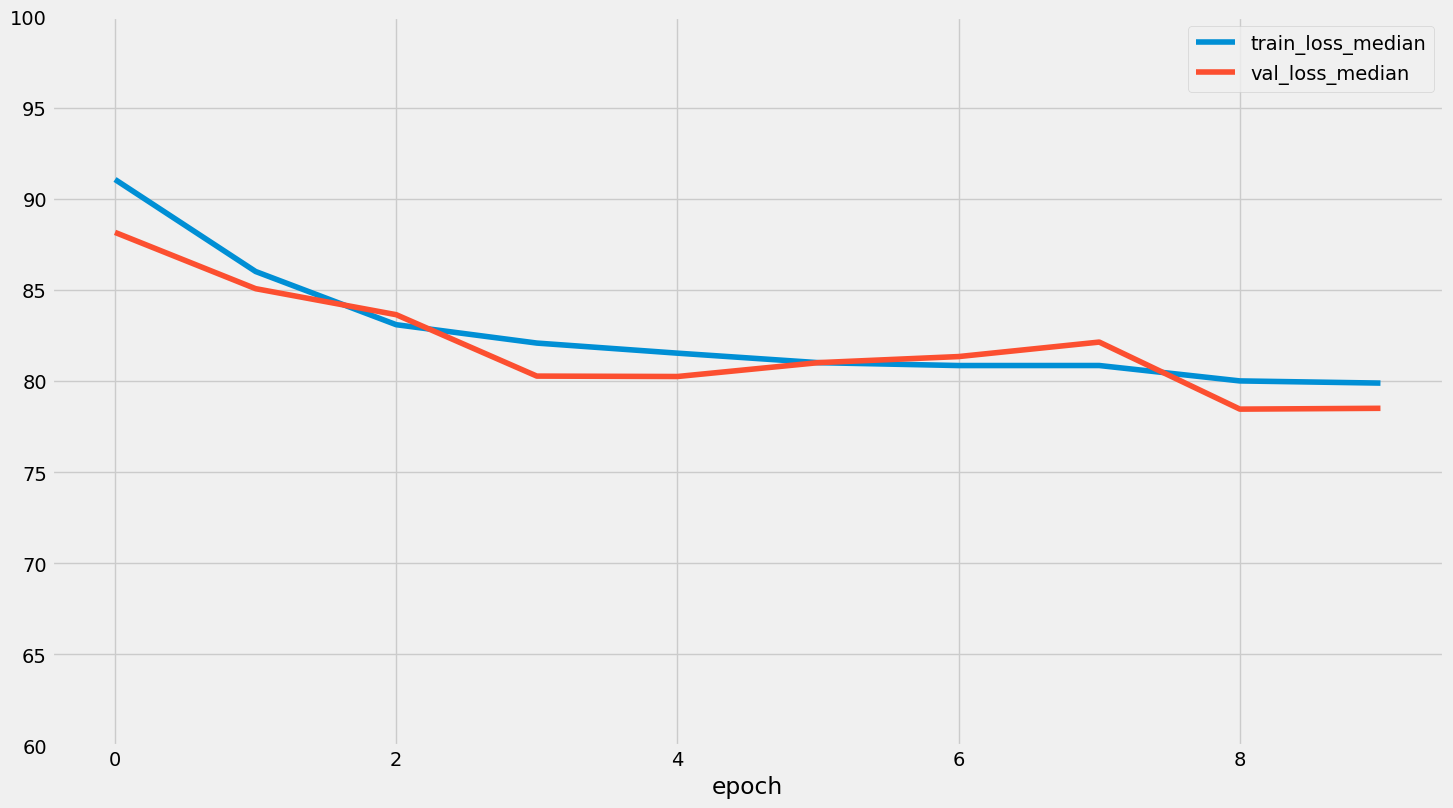

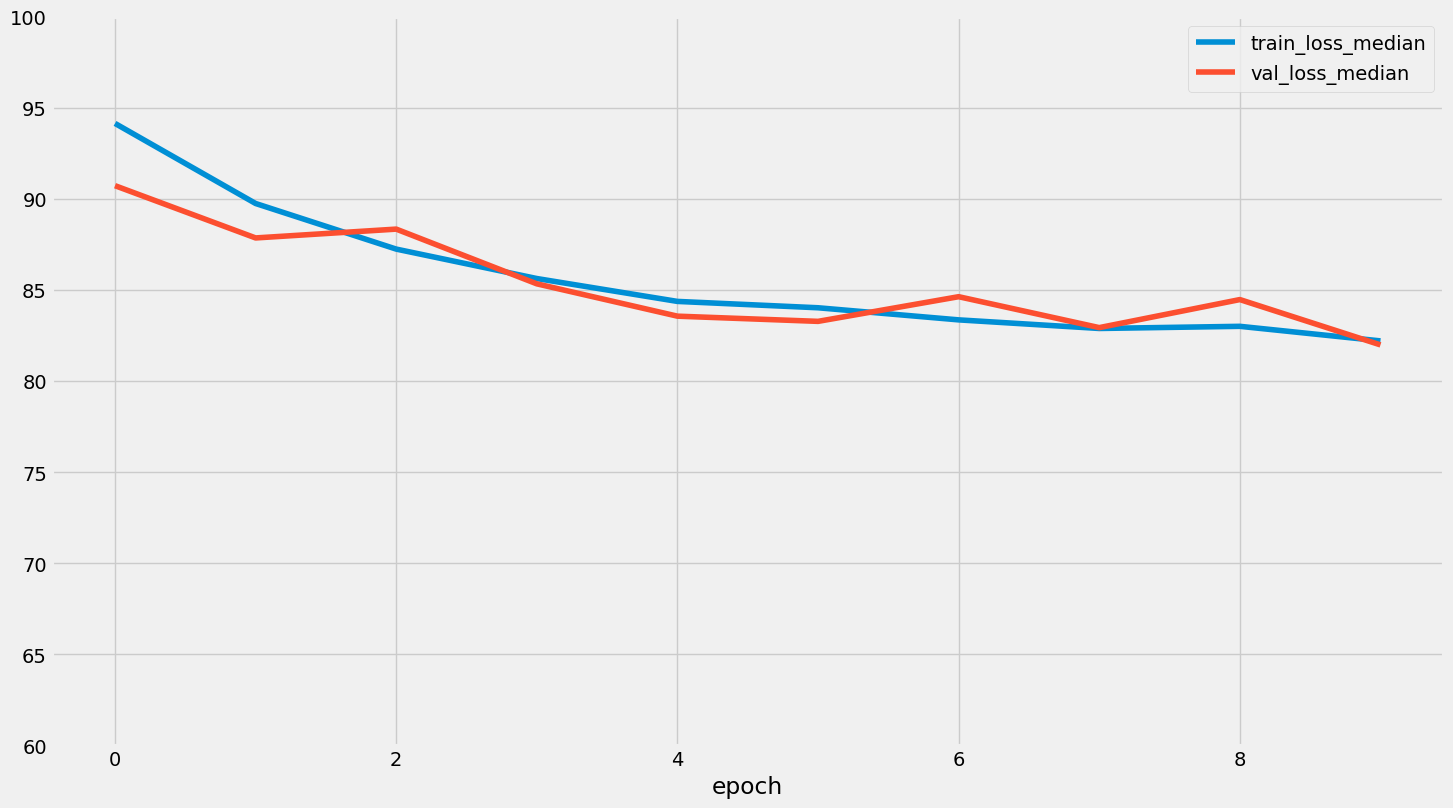

In [27]:
idx = 1
plot_single_config(idx,data_dir)

## Ablation Studies

In [43]:
channel_data_dir = root_dir+all_channels
satellite_data_dir = root_dir+satellites
o = get_best_model(5,channel_data_dir)


def plot_ablation(data_dir,metric = 'val_loss_median',id_='exclude_layer_name',title='sometitle'):

    result_dict = {}
    param_dict = {}

    average_validation_rmse_final_epoch = []
    excluded_channel = []

    for config_index in range(len(os.listdir(data_dir))):
        results,params = get_best_model(config_index,data_dir)
        
        result_dict[config_index] = results
        param_dict[config_index] = params

        final_epoch = params['num_epochs']-1
        perf = results.iloc[final_epoch]['val_loss_median']

        average_validation_rmse_final_epoch.append(perf)
        excluded_channel.append(params[id_])

    plt.style.use('fivethirtyeight')


    plot_df = pd.DataFrame({'excluded_channel':excluded_channel,
                            'rmse':average_validation_rmse_final_epoch}).sort_values('rmse',ascending=False)
    #            kind = 'barh',

    #plt.figure(figsize=[16,9])

    plot_df.plot(kind='barh',x='excluded_channel',figsize=[16,9],xlim=[40,95])
    #plt.barh(excluded_channel,
    #         average_validation_rmse_final_epoch,
    #         linewidth = 2)
    plt.title(title)
    plt.tight_layout()
    plt.savefig('{}.png'.format(title))
    
    plt.show()
    
    return param_dict,result_dict


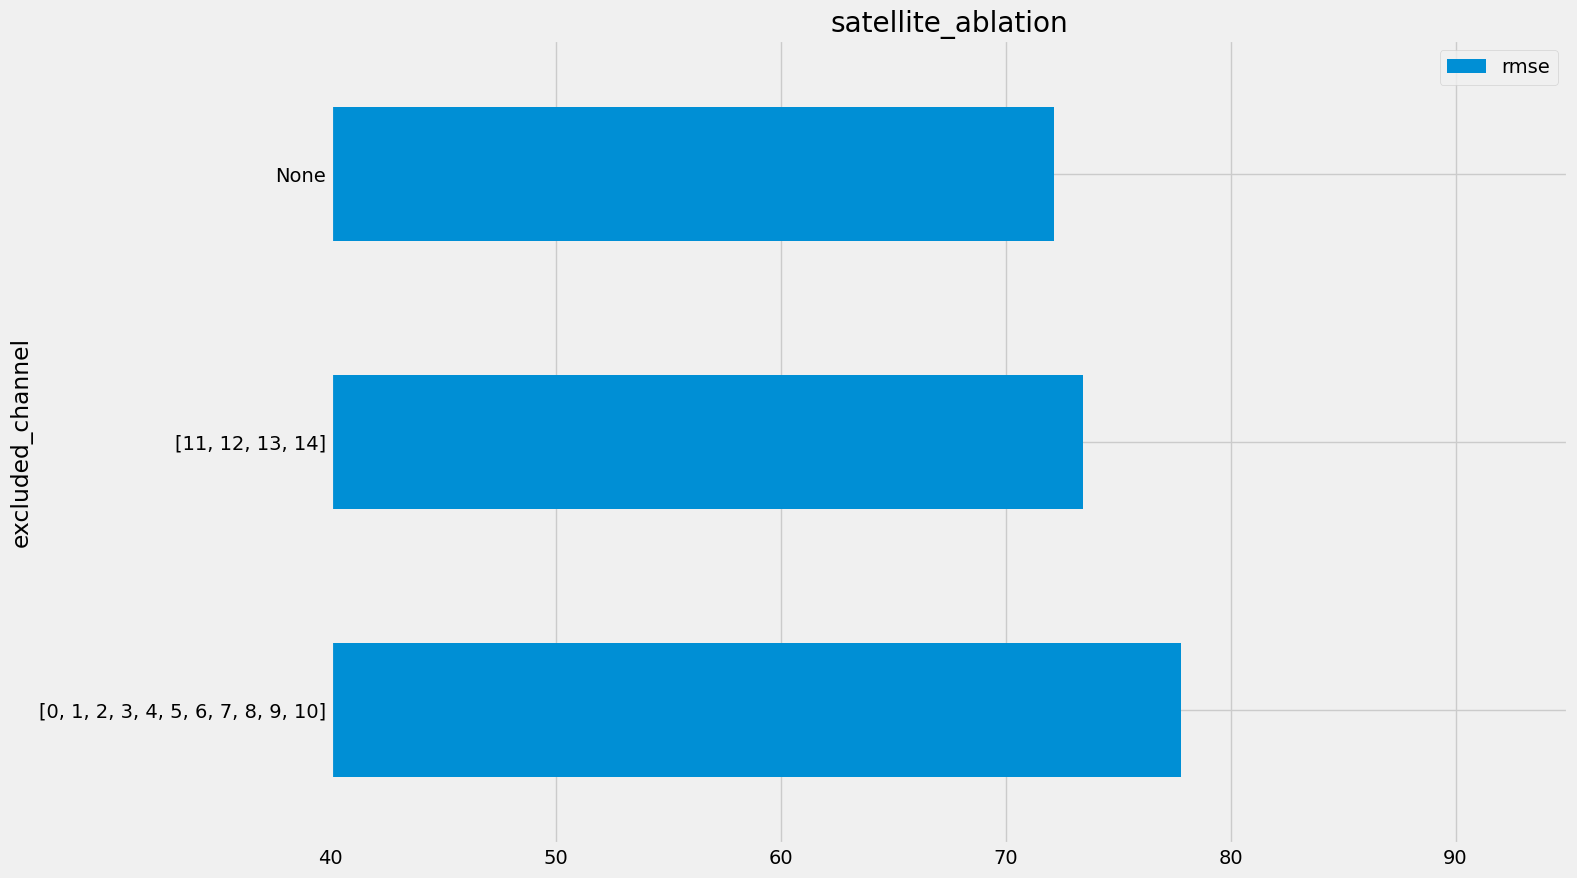

In [44]:
# plot 1 
#### Satellite Ablation Barchart
param_dict,result_dict = plot_ablation(satellite_data_dir,id_='exclude_layer',title='satellite_ablation')

In [30]:
param_dict

{0: {'num_input_channels': 15,
  'conv_filters1': 4,
  'conv_filters2': 8,
  'conv_filters3': 4,
  'num_dpoints': 6000,
  'exclude_layer': None,
  'exclude_layer_name': 'No Layer Excluded',
  'num_epochs': 10},
 1: {'num_input_channels': 11,
  'conv_filters1': 8,
  'conv_filters2': 16,
  'conv_filters3': 16,
  'num_dpoints': 6000,
  'exclude_layer': [11, 12, 13, 14],
  'exclude_layer_name': 'S1-VV-Asc: Cband-10m, S1-VH-Asc: Cband-10m, S1-VV-Desc: Cband-10m, S1-VH-Desc: Cband-10m',
  'num_epochs': 10},
 2: {'num_input_channels': 4,
  'conv_filters1': 16,
  'conv_filters2': 32,
  'conv_filters3': 16,
  'num_dpoints': 6000,
  'exclude_layer': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'exclude_layer_name': 'S2-B2: Blue-10m, S2-B3: Green-10m, S2-B4: Red-10m, S2-B5: VegRed-704nm-20m, S2-B6: VegRed-740nm-20m, S2-B7: VegRed-780nm-20m, S2-B8: NIR-833nm-10m, S2-B8A: NarrowNIR-864nm-20m, S2-B11: SWIR-1610nm-20m, S2-B12: SWIR-2200nm-20m, S2-CLP: Clouse_gpuudProb-160m',
  'num_epochs': 10}}

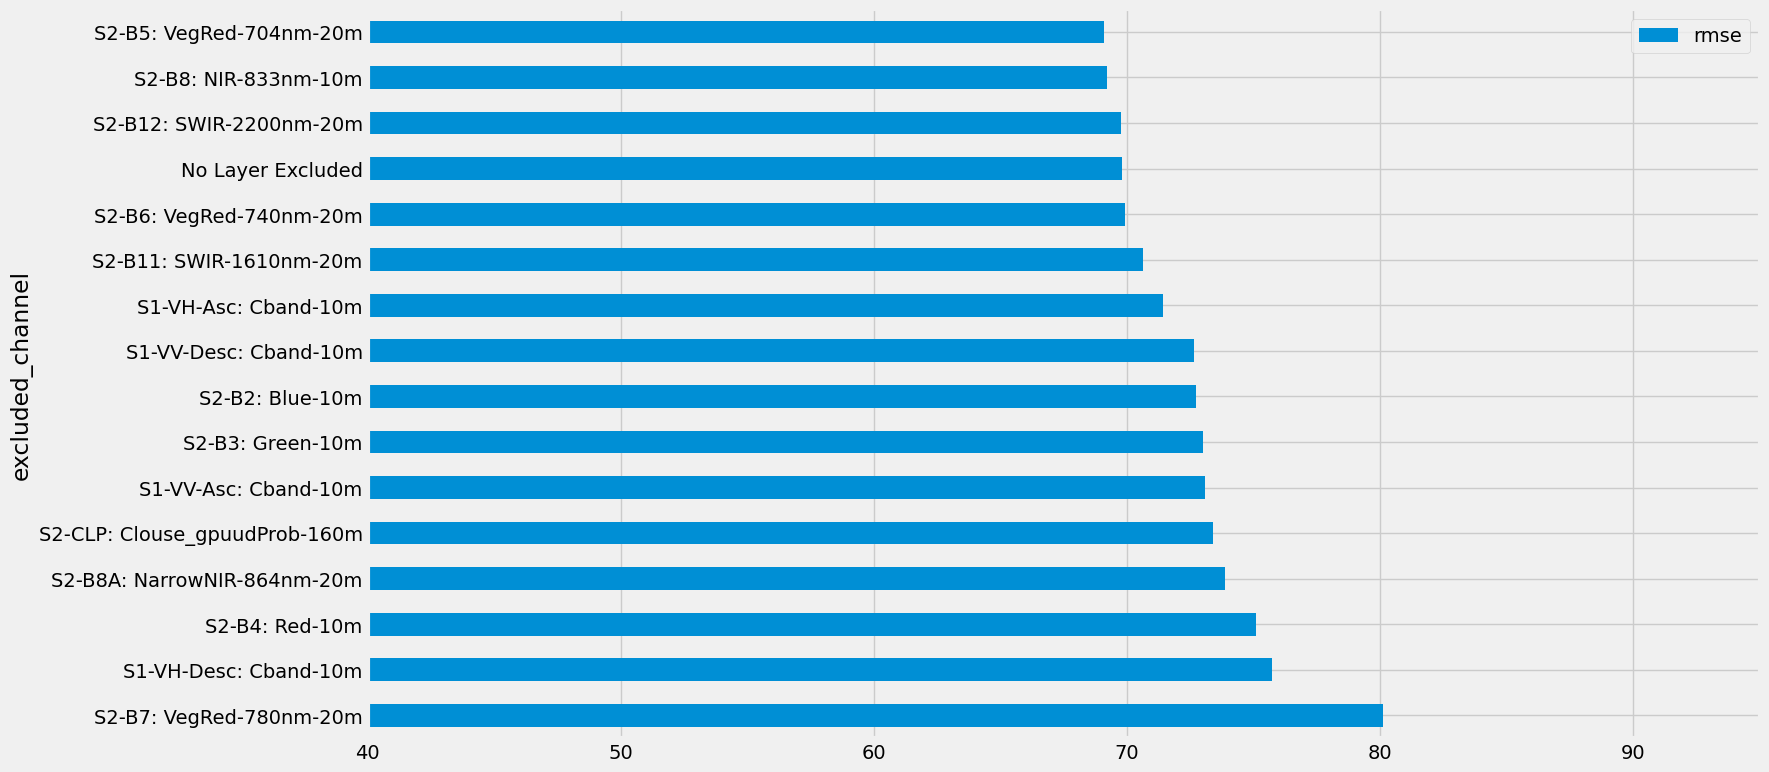

In [18]:
# plot 2
#### Channel Ablation Barchart
plot_ablation(channel_data_dir)

## Code to fetch Data for evalutation

In [38]:
from collections import defaultdict
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import data_loader as dl



def load_single_SentinelDataset(fpath='large_subset.csv',
                            max_chips=None,
                            dir_tiles = 'large_sample/sentinel/',
                            dir_target = 'large_sample/target/',
                            dir_test = 'large_sample/test_features/'):


    dataset = dl.SentinelDataset(tile_file=fpath,
                                dir_tiles=dir_tiles,
                                dir_target=dir_target,
                                max_chips=max_chips,
                                transform=None,
                                device='cpu'
                                )
    
    return dataset
    



def create_dataloader_from_indexes(indexes,fpath,exclude_layer=None,num_dpoints=100):

    input_ = []
    target_ = []
    

    dataset = load_single_SentinelDataset(fpath=fpath,max_chips = num_dpoints)
    if num_dpoints == None:
        num_dpoints = len(dataset)
    for i in tqdm(range(num_dpoints)):
        all_channels = [channel for channel in dataset.__getitem__(i)['image']]
        if exclude_layer != None:
            if isinstance(exclude_layer,list):
                for idx,c in enumerate(exclude_layer):
                    all_channels.pop(c-idx)
            else:
                all_channels.pop(exclude_layer)


        input_.append(torch.stack(all_channels))
        target_.append(dataset.__getitem__(i)['label'])


    input_tensor = torch.stack([input_[idx] for idx in indexes])
    target_tensor = torch.stack([target_[idx] for idx in indexes])

    # Create a PyTorch data loader
    test_data = torch.utils.data.TensorDataset(input_tensor, target_tensor)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)

        
    return test_loader


def predict(model,indexes,num_dpoints=100,fpath='large_subset.csv'):
        
    metrics = dict()
    # Define the loss function and optimizer
    criterion = nn.MSELoss(reduction='mean')
    loader = create_dataloader_from_indexes(indexes,fpath,num_dpoints=num_dpoints)



    cur_losses = []
    for i, (inputs, labels) in tqdm(enumerate(loader)):

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        train_loss = np.round(np.sqrt(loss.item()), 5)
        cur_losses.append(train_loss)


    metrics['train_loss_median'] = np.median(cur_losses)
    metrics['train_loss_mean'] = np.mean(cur_losses)
    metrics['train_loss_std'] = np.std(cur_losses)


    return metrics





## Code to fetch Model for evalutation

In [34]:
from train_CNN import CNN
import torch

def get_model_args(args):
    CNN_params = ['num_input_channels', 'conv_filters1', 'conv_filters2', 'conv_filters3']
    return {p:args[p] for p in CNN_params}



def get_best_model_index(idx,data_dir,eval_metrix = 'val_loss_median'):
    # idx references the index of the global configuration (i.e. ablation-setting)
    # model_outputs/study/[ablation_idx]/[config_idx] 
    # This means that this function returns the best model for a given ablation study (fx excluding channel 0 or channel 1 or satellite 2...)

    config_dir = sorted(os.listdir(data_dir))[idx]



    dfs = {}
    configurations = {}
    for config_index in range(len(os.listdir(data_dir+config_dir))):
        df = pd.read_csv(data_dir+config_dir+'/'+str(config_index)+'/results.csv')
        dfs[config_index] = df
        
        with open(data_dir+config_dir+'/'+str(config_index)+'/parameters.json','r') as file:
            for line in file:
                conf = json.loads(line)
        
        configurations[config_index] = conf
        
        

    plt.style.use('fivethirtyeight')
    
    
    cur_min = 1000
    cur_min_index = 99
    best_agg = None
    for index,df in dfs.items():
        agg_df = aggregate_result(df,index)
        m = agg_df[eval_metrix].min()
        if m<cur_min:
            cur_min = m
            cur_min_index = index
            best_agg = agg_df
            
            
    return cur_min_index
    

def get_model_path(ablation_index,data_dir):

    bmx = get_best_model_index(ablation_index,data_dir)

    config_dir = os.listdir(data_dir)[ablation_index]

    return data_dir+config_dir+'/'+str(bmx)+'/model_state_dict'



# Compare performance across months
## First create subsets for the same n chips, for each month

In [35]:
# Create subsets for each month
import random

num_chips = 100


ls = pd.read_csv("large_subset.csv",index_col=0).drop_duplicates().reset_index().drop('index',axis=1).sort_index(ascending=False)


for month in range(12):
    random_chip = random.choice(ls['chipid'].unique())

    indexes = []
    for chip in range(num_chips):
        ix = ls.loc[(ls['month']==month)&(ls['chipid']==random_chip)].index.values[0]
        indexes.append(ix)

    ls.iloc[indexes].to_csv('subset_{}_{}.csv'.format(num_chips,month))


## Select Model

In [36]:
study_dir = data_dir

# Chose a random model (e.g. excluding some layer)
# standard is to use the full model
ablation_index = 0

results,params = get_best_model(ablation_index,data_dir)


PATH = get_model_path(ablation_index,data_dir)

model_args = get_model_args(params)
model = CNN(**model_args)
model.load_state_dict(torch.load(PATH))
model.eval()

CNN(
  (conv1): Conv2d(15, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(4, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

## Then evaluate the mode on each

100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 38.61it/s]
100it [00:00, 224.89it/s]
100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.58it/s]
100it [00:00, 219.49it/s]
100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 38.27it/s]
100it [00:00, 208.13it/s]
100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 38.04it/s]
100it [00:00, 189.43it/s]
100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.25it/s]
100it [00:00, 220.99it/s]
100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.79it/s]
100it [00:00, 201.65it/s]
100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 38.60it/s]
100it [00:00, 193.96it/s]
100%|██████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.27it/s]
100it [00:00, 227.73it/s]
100%|███

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

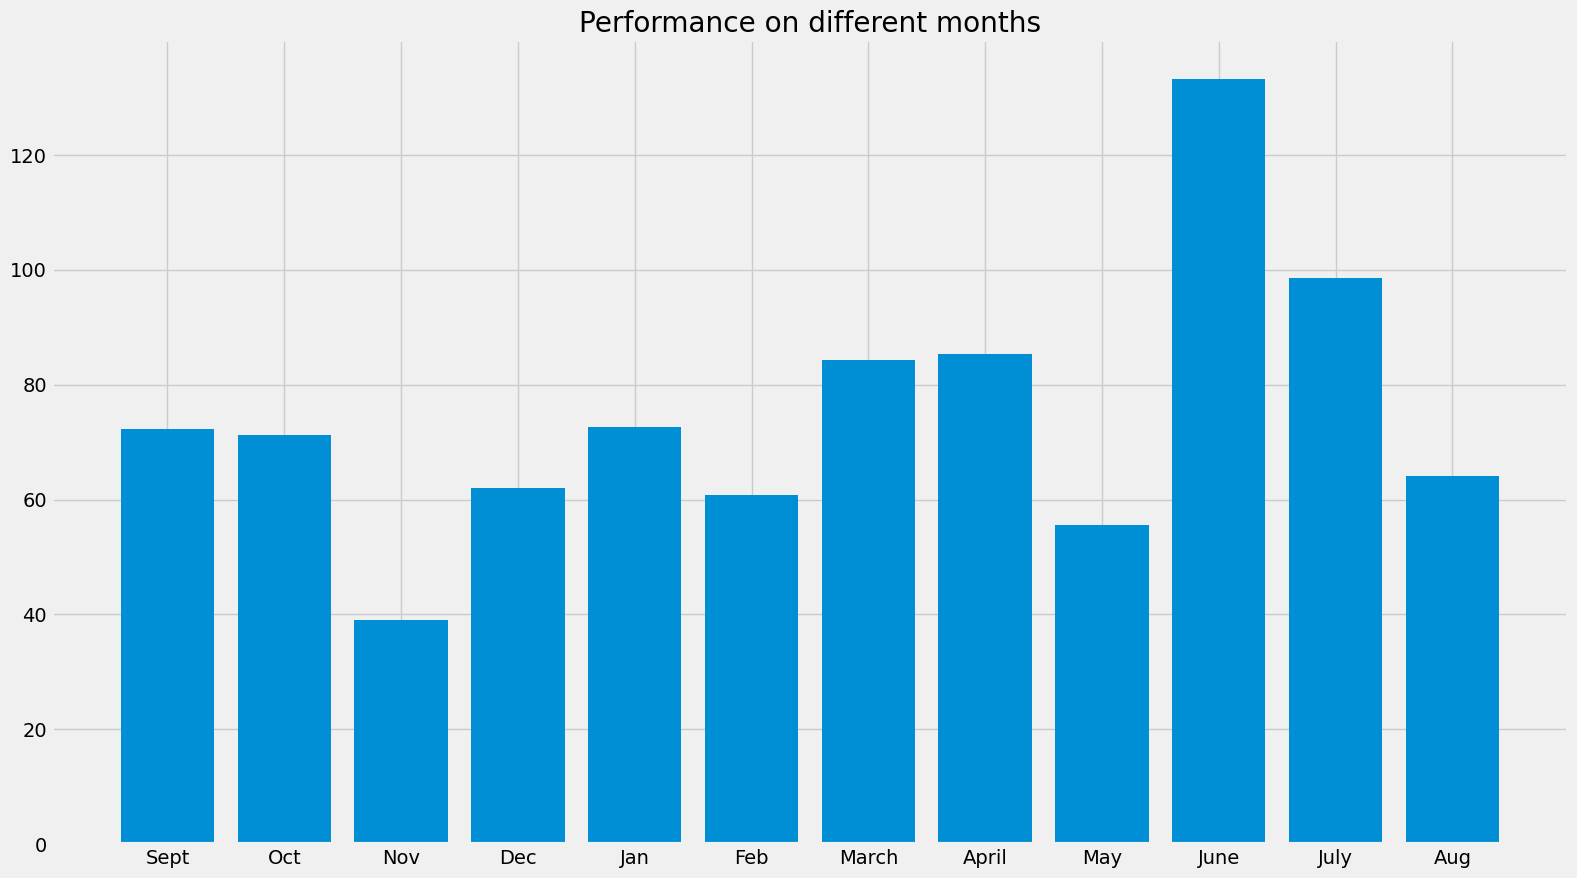

In [40]:
perfs = []

for month in range(12):
    fpath = 'subset_100_{}.csv'.format(month)
    perfs.append(predict(model,indexes=[i for i in range(100)],num_dpoints=100,fpath = fpath))




y = [p['train_loss_median'] for p in perfs]

months = ['Sept','Oct','Nov','Dec','Jan','Feb','March','April','May','June','July','Aug']

plt.figure(figsize=[16,9])
plt.bar(x=months,height = y)
plt.title('Performance on different months')
plt.tight_layout()
plt.savefig('months.png')
plt.show()

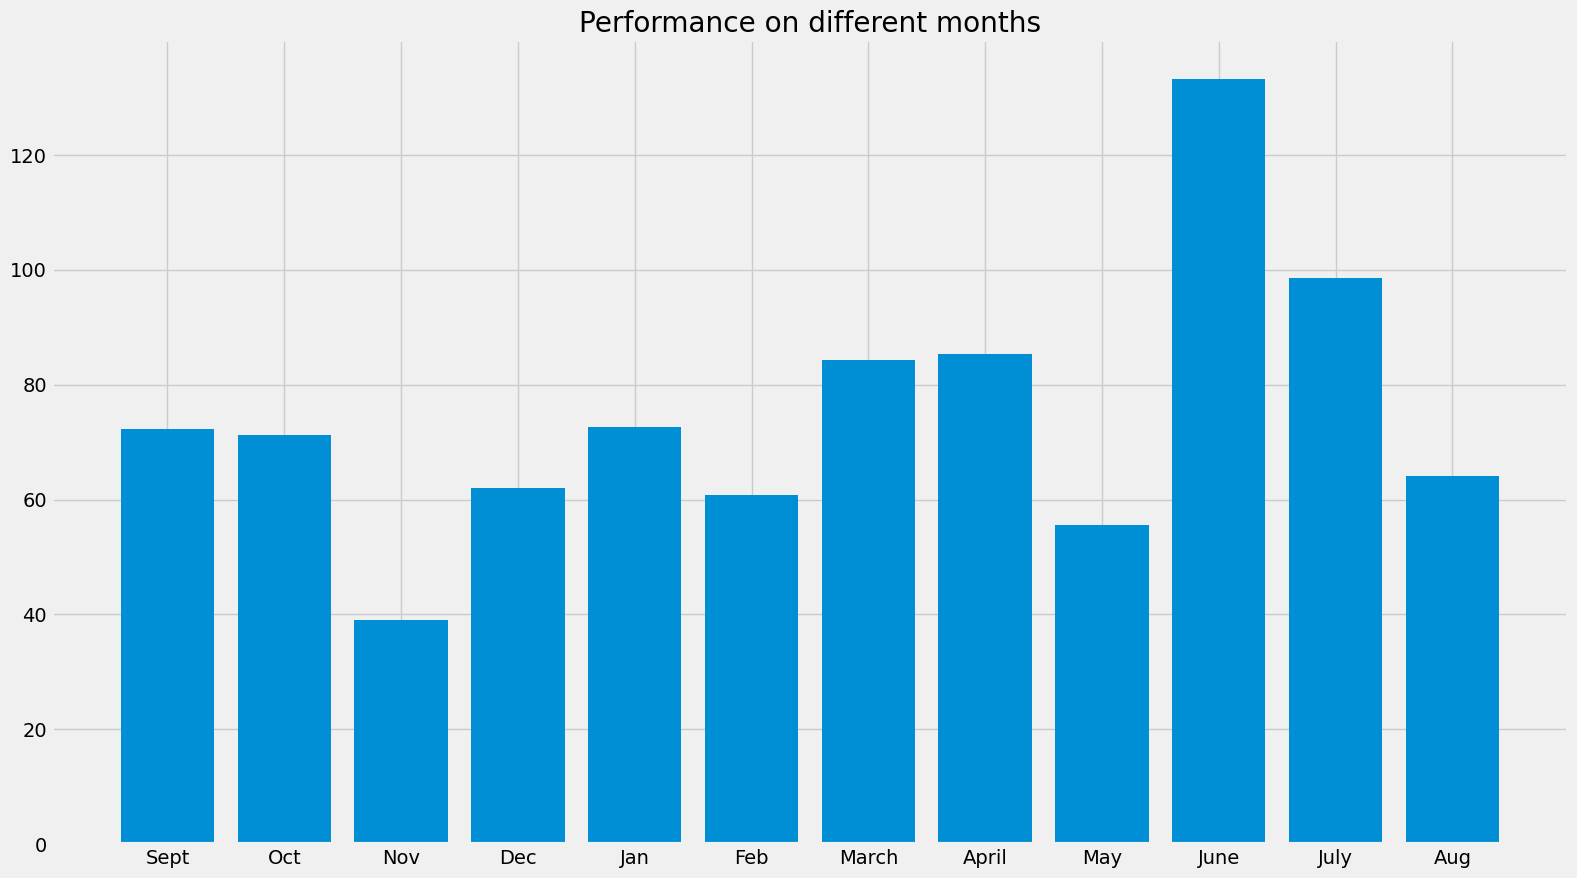

In [41]:
plt.figure(figsize=[16,9])
plt.bar(x=months,height = y)
plt.title('Performance on different months')
plt.tight_layout()
plt.savefig('months.png')
plt.show()

In [42]:
!open .